<a href="https://colab.research.google.com/github/MaretyaTya/PVCK_Genap_2022/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [100]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import glob
import math

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


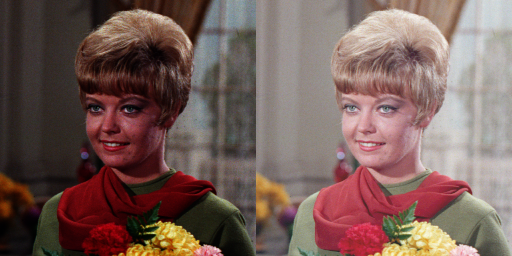

In [4]:
image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')

print(' Gamma Correction pada citra ')
print('----------------------------------')

try: 
  gamma = int(input('Masukkan nilai Gamma: '))
  invGamma = 1.0 / gamma


  table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
  gamma_image = cv.LUT(image, table)

  final_frame = cv.hconcat((image, gamma_image))
  cv2_imshow(final_frame)

except ValueError:
 print('Error, not a number')

Masukkan Nilai Bit Depth: 3


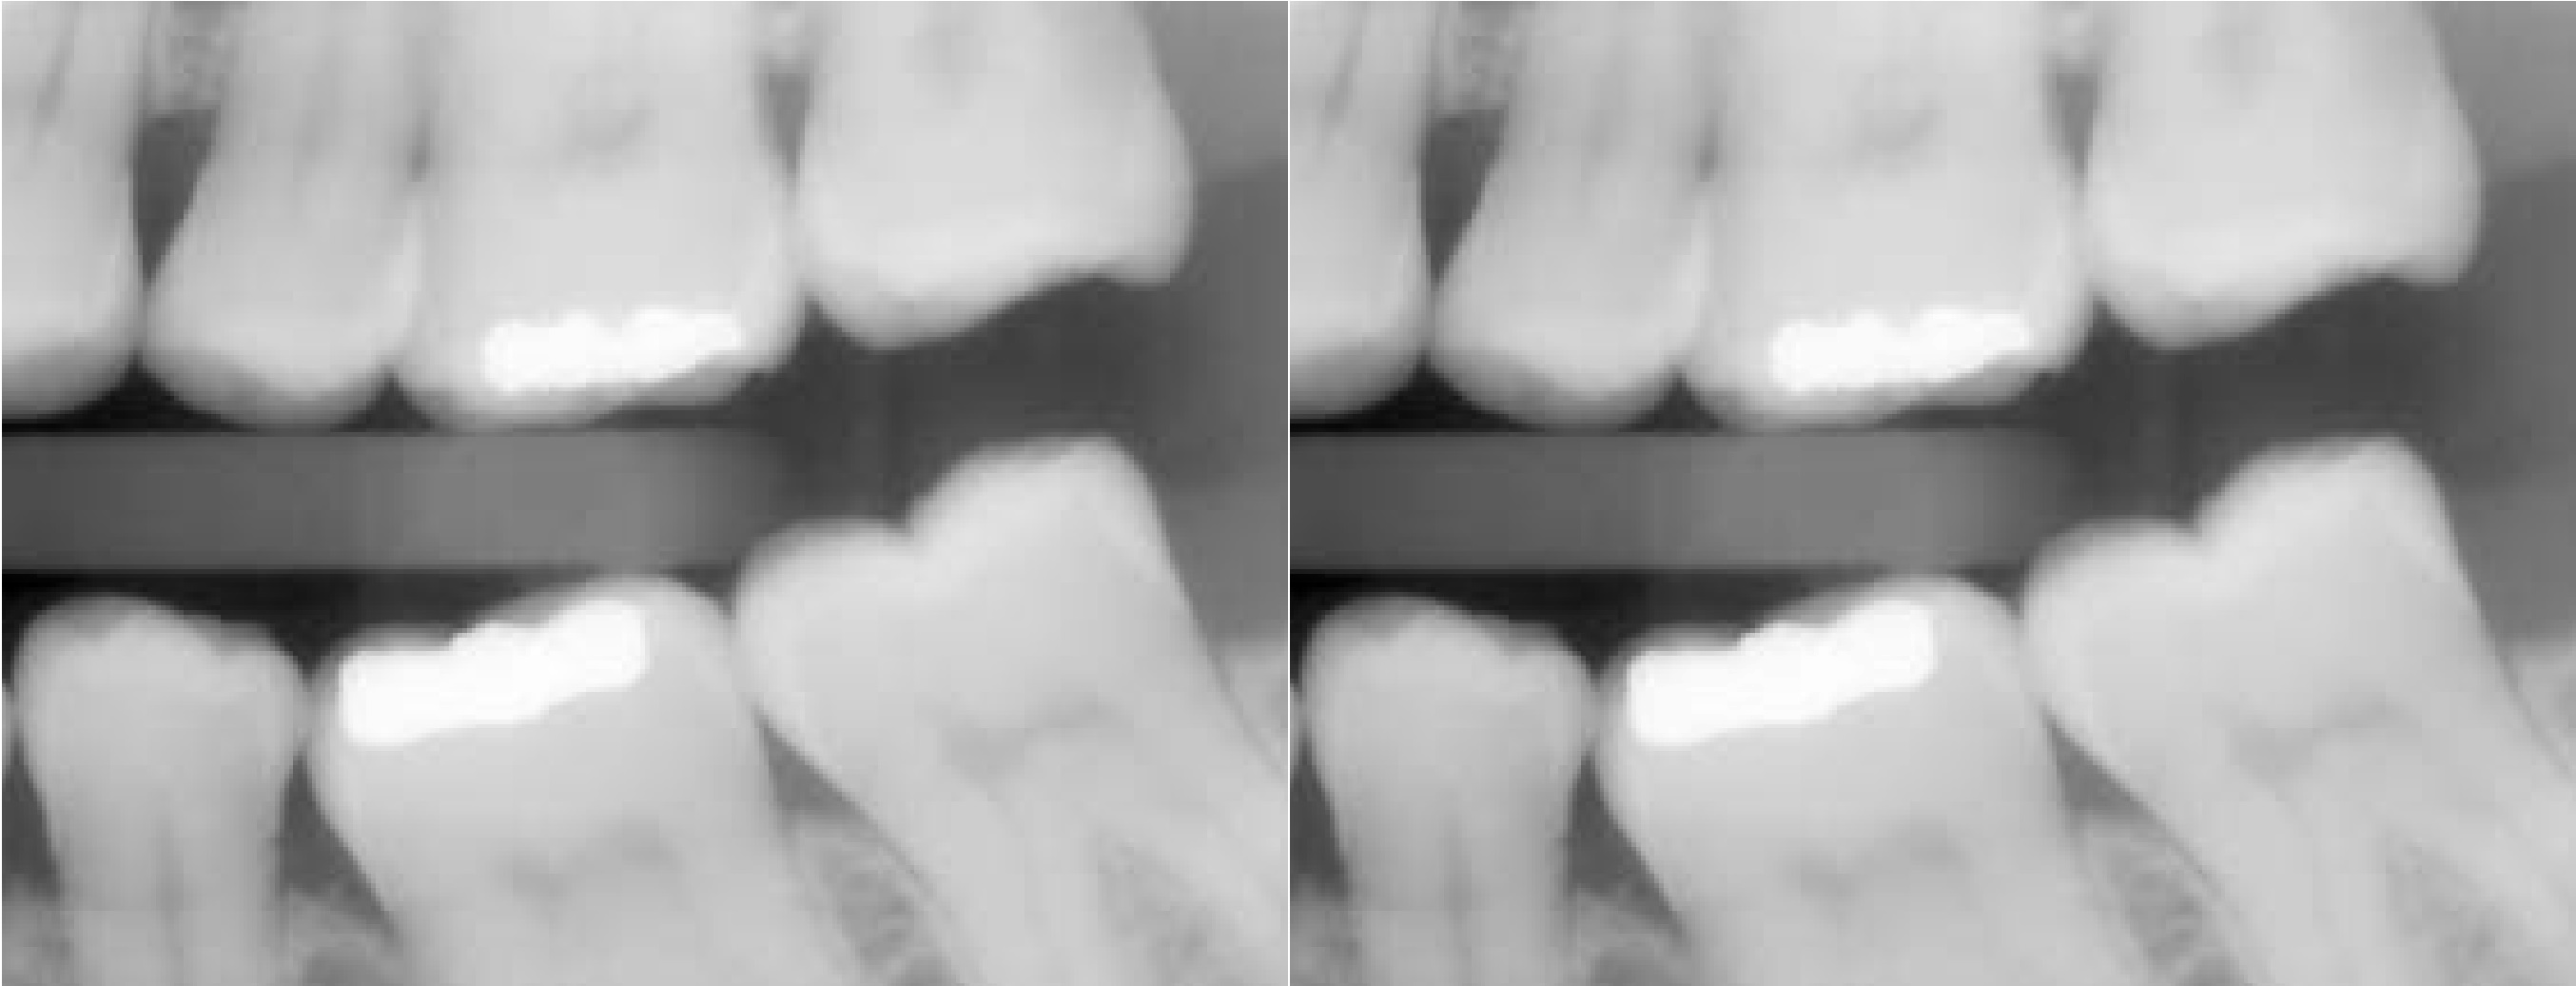

In [105]:
img_2 = image.copy()
depth_image = np.zeros(img_2.shape, img_2.dtype)

try :
  bit = int(input('Masukkan Nilai Bit Depth: '))
except ValueError :
    print('Number Error')

level = 255/(2**bit)-1
for y in range(img_2.shape[0]):
  for x in range(img_2.shape[1]):
    depth_image[y,x] = np.clip(img_2[y,x]/level * level, 0, 255)

final_frame = cv.hconcat((img_2, depth_image))
cv2_imshow(final_frame)

In [ ]:
cv_img = []
pnsr_array = []

for img in glob.glob("/content/drive/MyDrive/PCVK_MM/Images/noises/*.jpg"):
  n= cv.imread(img)
  cv_img.append(n)

def PNSR(img):
  mse = np.mean(img ** 2)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  pnsr = 20*math.log10(max_pixel / math.sqrt(mse))
  return pnsr


for x in range(len(cv_img)):
  pnsr = PNSR(cv_img[x])
  pnsr_array.append(pnsr)

average_5 = np.mean(pnsr_array[:5])
average_30 = np.mean(pnsr_array[:30])
average_60 = np.mean(pnsr_array[:60])
average_80 = np.mean(pnsr_array[:80])
average_100 = np.mean(pnsr_array[:100])

# print(pnsr_array)
print("Average dari 5 image adalah : ", average_5)
print("Average dari 30 image adalah : ", average_30)
print("Average dari 60 image adalah : ", average_60)
print("Average dari 80 image adalah : ", average_80)
print("Average dari 100 image adalah : ", average_100)

Average dari 5 image adalah :  27.732284775239727
Average dari 30 image adalah :  27.728256905323338
Average dari 60 image adalah :  27.727370722853227
Average dari 80 image adalah :  27.72672577130344
Average dari 100 image adalah :  27.726468442501435


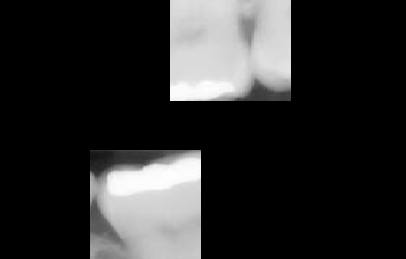

In [60]:
image = cv.imread("/content/drive/MyDrive/PCVK_MM/Images/teeth.jpg")

image = cv.resize(image, (0,0), fx=0.30, fy=0.25)

mask = np.zeros(image.shape[:2], dtype="uint8")
cv.rectangle(mask, (90, 150), (200, 300), 255, -1)

cv.rectangle(mask, (170, 0), (290, 100), 255, -1)

masked = cv.bitwise_and(image, image, mask=mask)
cv2_imshow(masked)

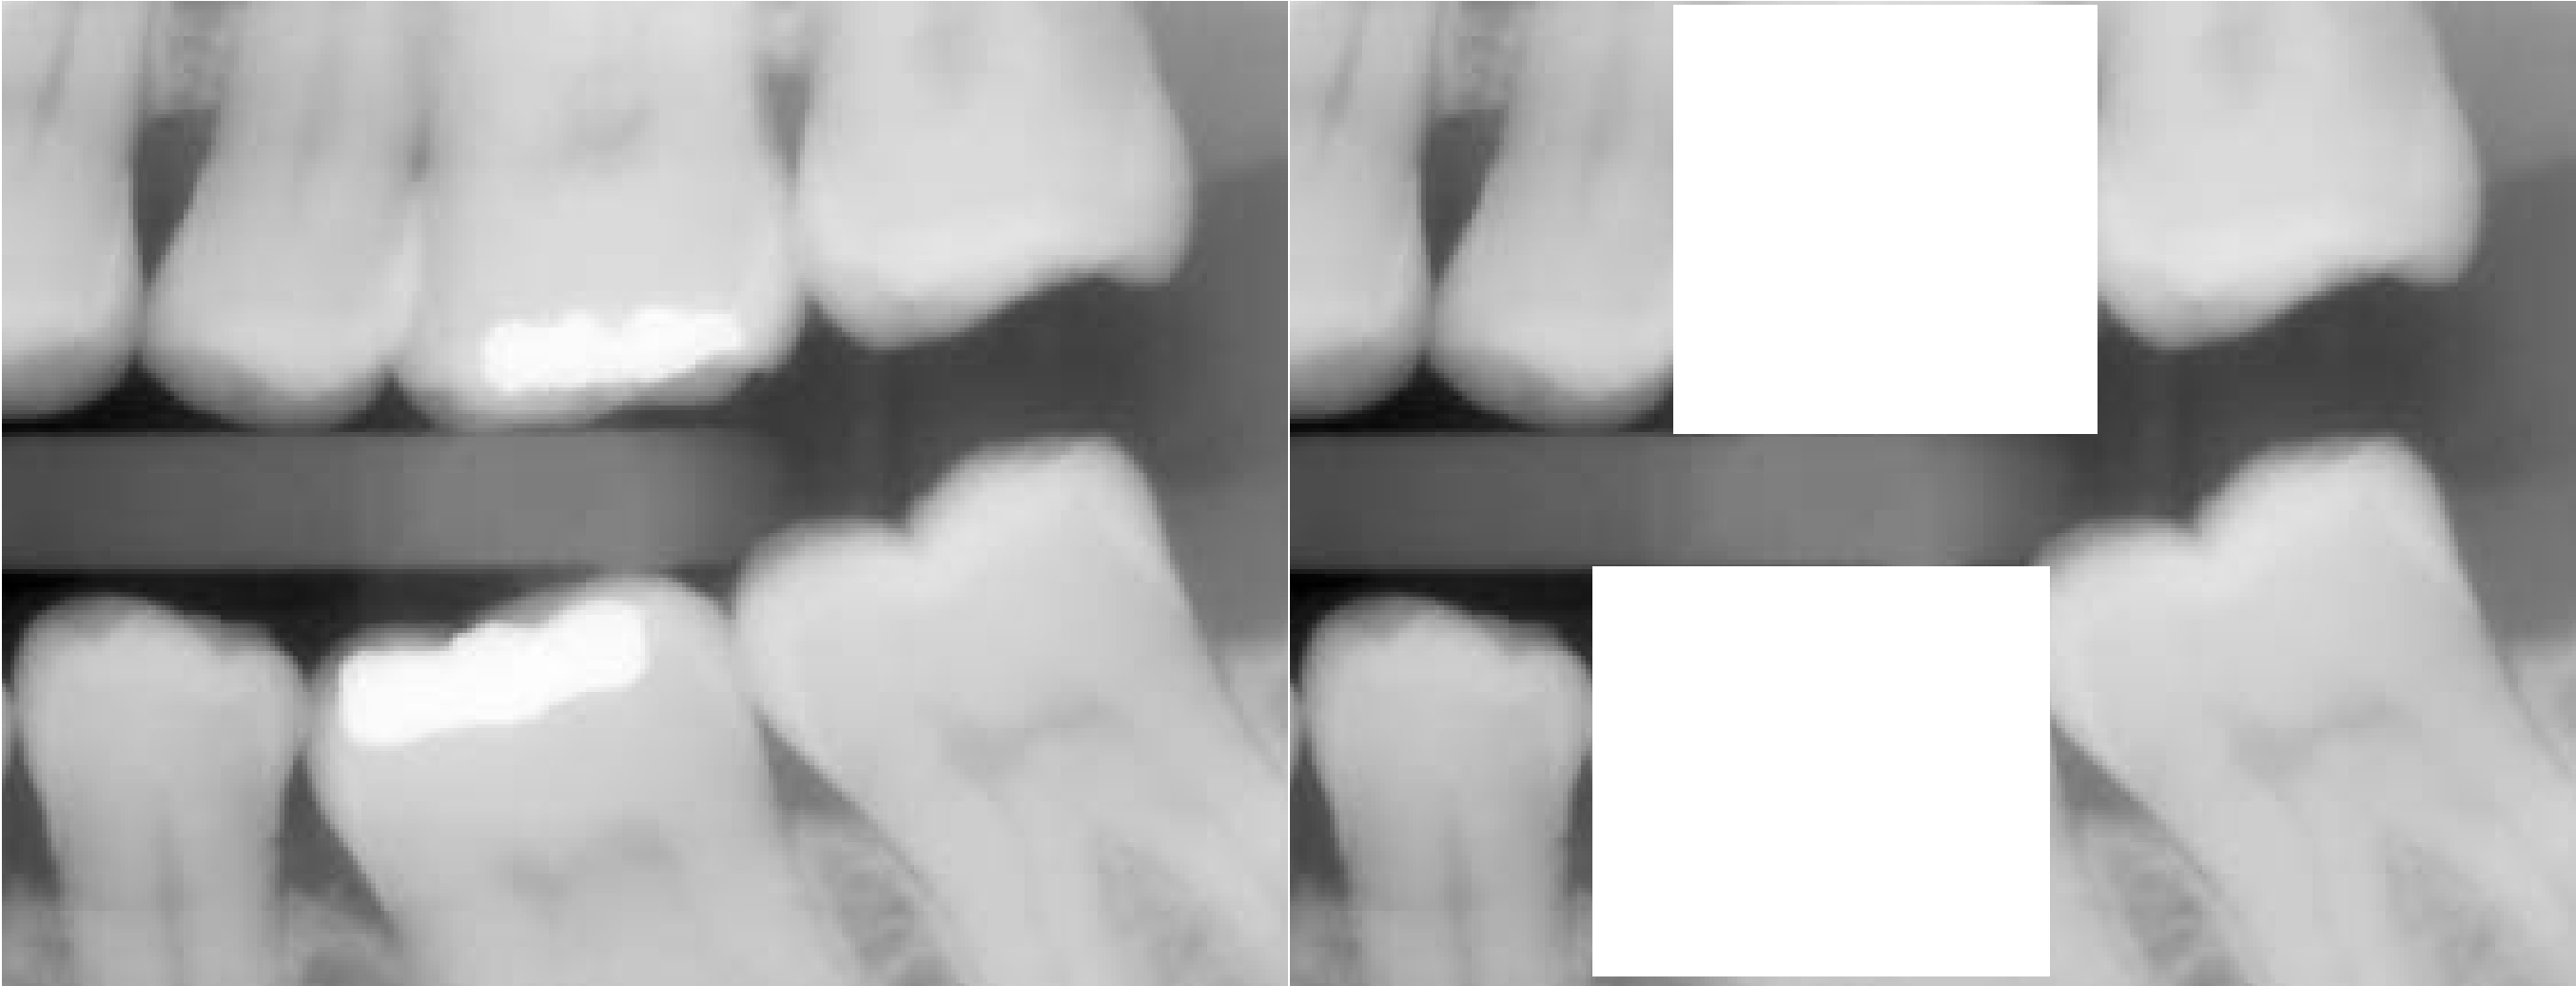

In [95]:
# OR
image = cv.imread("/content/drive/MyDrive/PCVK_MM/Images/teeth.jpg")
mask_or = np.zeros(img.shape, dtype=np.uint8)
mask_or = cv.rectangle(mask_or,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img | mask_or

mask_or1 = cv.rectangle(mask_or,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_or1 = img | mask_or1

final_frame = cv.hconcat((img, result_or1))
cv2_imshow(final_frame)

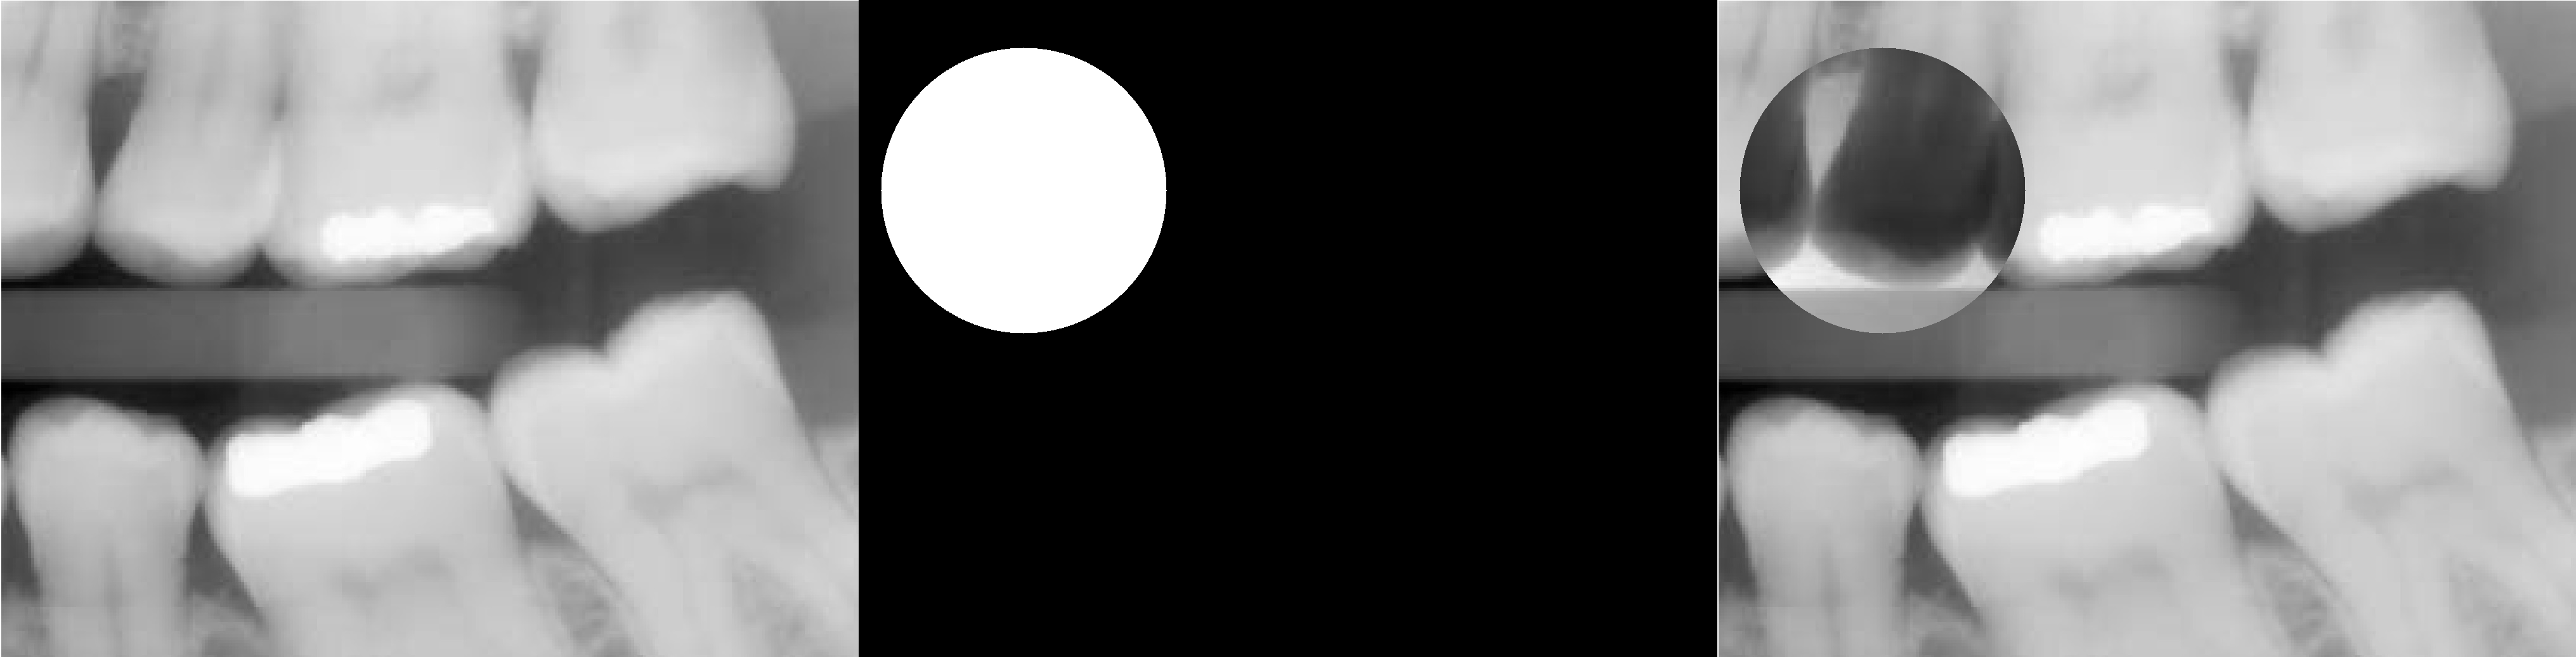

In [93]:
# NOT
image = cv.imread("/content/drive/MyDrive/PCVK_MM/Images/teeth.jpg")

mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

result = img ^ mask

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

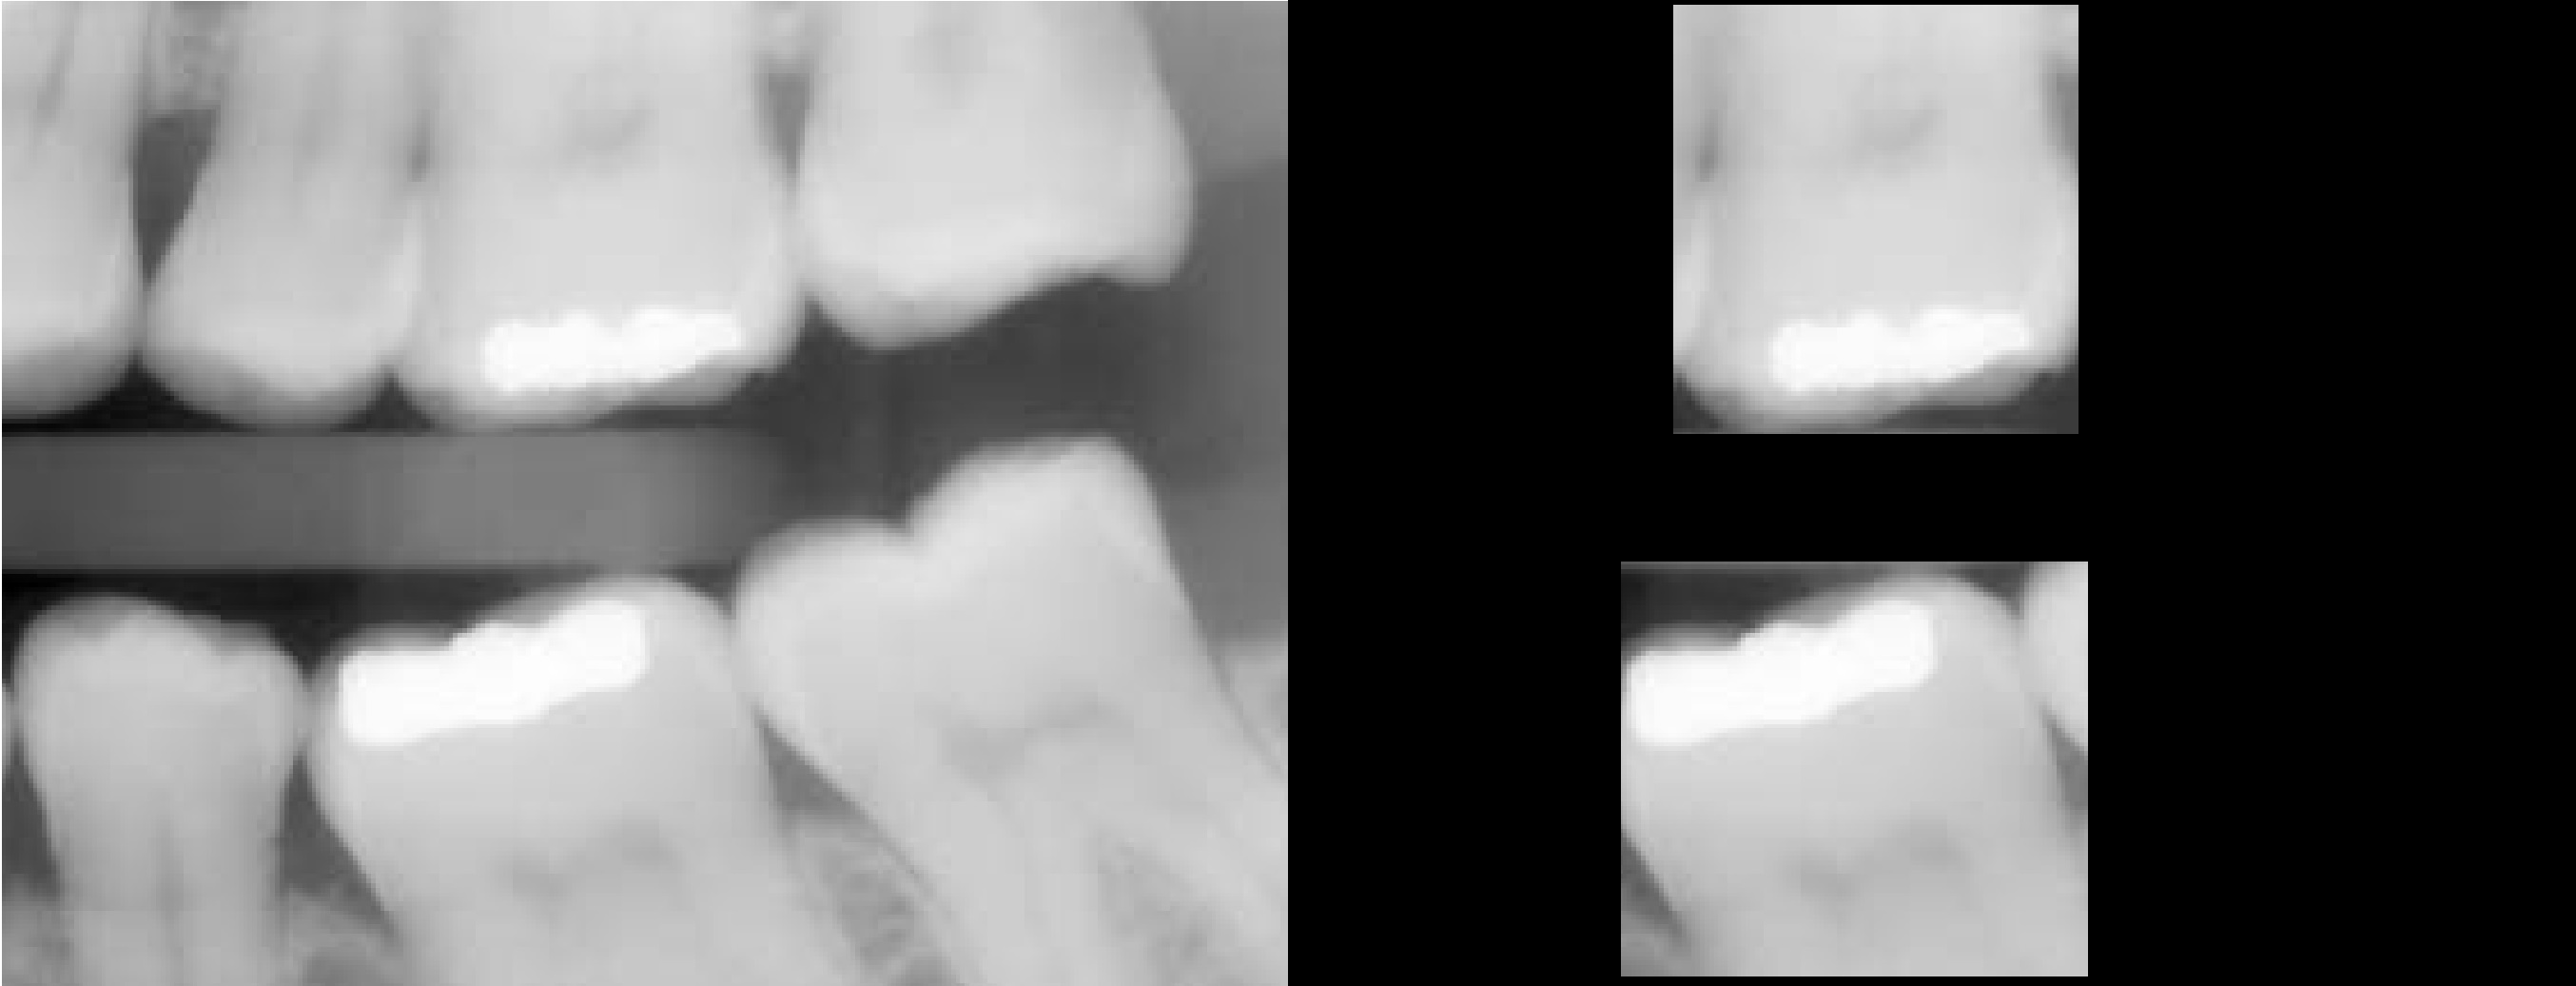

In [96]:
# AND
image = cv.imread("/content/drive/MyDrive/PCVK_MM/Images/teeth.jpg")
mask = np.zeros(img.shape, dtype=np.uint8)

mask = cv.rectangle(mask,pt1=(350,590),pt2=(840,1025),color=(255,255,255),thickness=-1)
result = img & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(830,455),color=(255,255,255),thickness=-1)
result = img & mask1

final_frame = cv.hconcat((img, result))
cv2_imshow(final_frame)

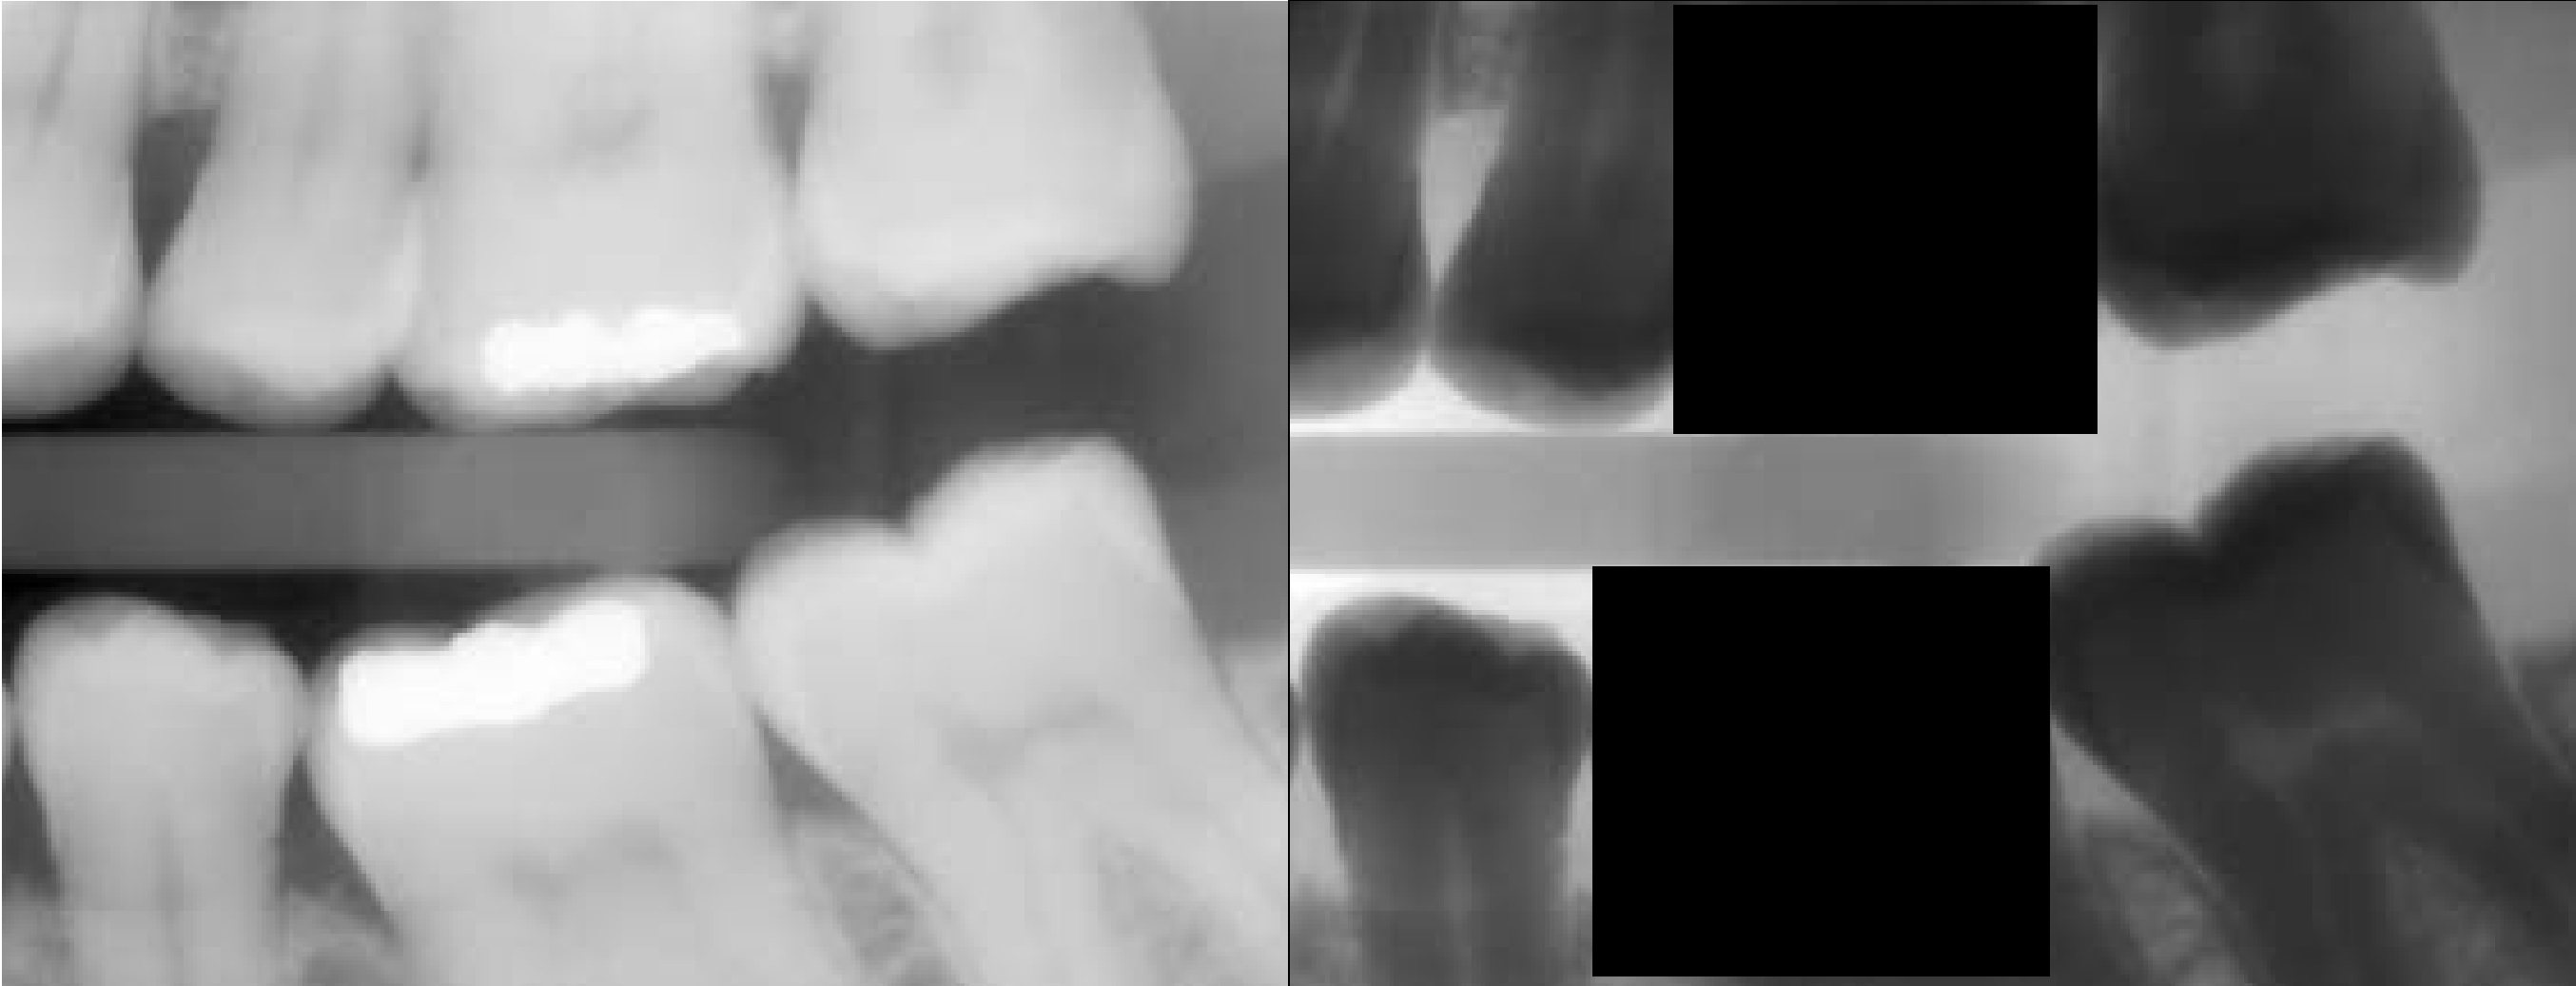

In [88]:
# XOR
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/teeth.jpg')
mask_not = np.zeros(img.shape, dtype=np.uint8)
mask_not = cv.rectangle(mask_not,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = ~img & ~mask_not

mask_not1 = cv.rectangle(mask_not,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_not1 = ~img & ~mask_not1

final_frame = cv.hconcat((img, result_not1))
cv2_imshow(final_frame)